<a href="https://colab.research.google.com/github/sdasilvas/NGG6050/blob/main/9_25_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

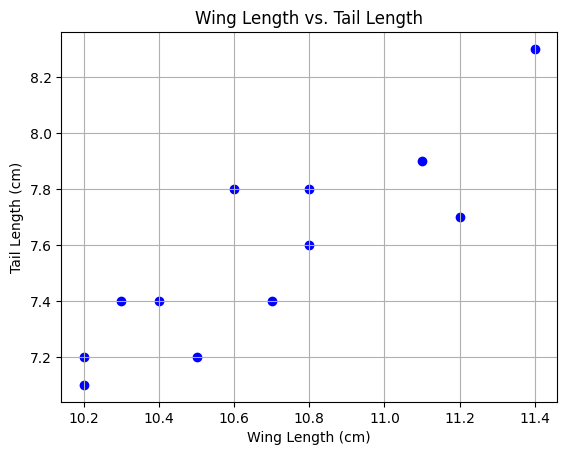

In [1]:
import matplotlib.pyplot as plt

# Data
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Create scatter plot
plt.scatter(wing_length, tail_length, color='blue', marker='o')

# Add titles and labels
plt.title('Wing Length vs. Tail Length')
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')

# Show grid
plt.grid()

# Display the plot
plt.show()

2

In [3]:
import numpy as np

# Data
X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Number of pairs
n = len(X)

# Calculate sums
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_XY = np.sum(X * Y)
sum_X2 = np.sum(X**2)
sum_Y2 = np.sum(Y**2)

# Calculate r_X,Y
r_XY = (n * sum_XY - sum_X * sum_Y) / np.sqrt((n * sum_X2 - sum_X**2) * (n * sum_Y2 - sum_Y**2))
r_squared_XY = r_XY**2

# Calculate r_Y,X (same as r_X,Y)
r_YX = r_XY  # or use the same formula, since it's symmetric
r_squared_YX = r_YX**2

# Display results
print("Manual Calculation:")
print(f"r_XY: {r_XY:.4f}, r^2_XY: {r_squared_XY:.4f}")
print(f"r_YX: {r_YX:.4f}, r^2_YX: {r_squared_YX:.4f}")

# Using numpy function
r_matrix = np.corrcoef(X, Y)
r_numpy_XY = r_matrix[0, 1]
r_numpy_YX = r_matrix[1, 0]  # This will be the same

# Display numpy results
print("Using numpy corrcoef:")
print(f"r_XY: {r_numpy_XY:.4f}, r^2_XY: {r_numpy_XY**2:.4f}")
print(f"r_YX: {r_numpy_YX:.4f}, r^2_YX: {r_numpy_YX**2:.4f}")

Manual Calculation:
r_XY: 0.8704, r^2_XY: 0.7575
r_YX: 0.8704, r^2_YX: 0.7575
Using numpy corrcoef:
r_XY: 0.8704, r^2_XY: 0.7575
r_YX: 0.8704, r^2_YX: 0.7575


3

In [4]:
import numpy as np

# Data
X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Number of pairs
n = len(X)

# Calculate sums and correlation
r_XY = np.corrcoef(X, Y)[0, 1]

# Calculate standard error
SE = np.sqrt((1 - r_XY**2) / (n - 2))

# Fisher transformation
z = 0.5 * np.log((1 + r_XY) / (1 - r_XY))
SE_z = 1 / np.sqrt(n - 3)

# Confidence intervals in z space
z_lower = z - 1.96 * SE_z
z_upper = z + 1.96 * SE_z

# Transform back to correlation coefficient space
r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

# Display results
print("Standard Error of r_XY:", SE)
print("95% Confidence Interval for r_XY: [{:.4f}, {:.4f}]".format(r_lower, r_upper))

Standard Error of r_XY: 0.15571863652567375
95% Confidence Interval for r_XY: [0.5923, 0.9632]


4

In [5]:
from scipy import stats

# Calculate the test statistic
t = (r_XY * np.sqrt(n - 2)) / np.sqrt(1 - r_XY**2)

# Degrees of freedom
df = n - 2

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t), df))

# Display results
print(f"Test statistic (t): {t:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")

# Check significance
if p_value < 0.05:
    print("Reject the null hypothesis: r_XY is statistically significant at the p < 0.05 level.")
else:
    print("Fail to reject the null hypothesis: r_XY is not statistically significant.")

Test statistic (t): 5.5893
Degrees of freedom: 10
p-value: 0.0002
Reject the null hypothesis: r_XY is statistically significant at the p < 0.05 level.


5

In [6]:
# Yale's correlation value
r_Yale = 0.75
n = 12  # Assuming same sample size

# Calculate the test statistic for Yale
t_Yale = (r_Yale * np.sqrt(n - 2)) / np.sqrt(1 - r_Yale**2)

# Degrees of freedom
df_Yale = n - 2

# Calculate the two-tailed p-value for Yale
p_value_Yale = 2 * (1 - stats.t.cdf(np.abs(t_Yale), df_Yale))

# Display results
print(f"Yale's Test Statistic (t): {t_Yale:.4f}")
print(f"Yale's Degrees of Freedom: {df_Yale}")
print(f"Yale's p-value: {p_value_Yale:.4f}")

# Check significance
if p_value_Yale < 0.05:
    print("Reject the null hypothesis: Yale's r is statistically significant at the p < 0.05 level.")
else:
    print("Fail to reject the null hypothesis: Yale's r is not statistically significant.")

Yale's Test Statistic (t): 3.5857
Yale's Degrees of Freedom: 10
Yale's p-value: 0.0050
Reject the null hypothesis: Yale's r is statistically significant at the p < 0.05 level.


6

In [8]:
import numpy as np
import scipy.stats as stats

# Desired correlation
r_true = 0.5
alpha = 0.05
desired_power = 0.8

# Fisher's Z transformation for r = 0 and r = 0.5
z0 = 0  # For r = 0
z_r = 0.5 * np.log((1 + r_true) / (1 - r_true))  # For r = 0.5

# Z-score for alpha level
z_alpha = stats.norm.ppf(1 - alpha / 2)  # Two-tailed

# Calculate required sample size
def required_sample_size(power, z_r, z0, z_alpha):
    n = 3 + ((z_alpha + (z_r - z0))**2) / (power**2)
    return np.ceil(n)

# Calculate sample size
sample_size = required_sample_size(desired_power, z_r, z0, z_alpha)

# Calculate the statistical power for the calculated sample size
n = int(sample_size)
SE = 1 / np.sqrt(n - 3)
power_calculated = stats.norm.cdf(z_alpha - (z_r - z0) / SE)

# Display results
print(f"Required sample size to achieve {desired_power:.2f} power: {sample_size:.0f}")
print(f"Calculated power with sample size {sample_size}: {power_calculated:.4f}")

Required sample size to achieve 0.80 power: 13
Calculated power with sample size 13.0: 0.5882
